In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Regression-Analysis-Data.csv")

In [3]:
df.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [4]:
df.tail()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000


In [5]:
df = df.drop('Observation', axis=1)

In [6]:
df.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,919.000000,919.000000,931.000000,924.000000,917.000000,932.000000,9.320000e+02
mean,8229.727965,11018.752992,13072.092374,1511.862554,1794.924755,785.579399,6.084695e+06
std,2561.985008,2543.920590,2586.456161,790.969660,468.159457,265.546853,5.025364e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,6476.000000,9354.500000,11301.500000,1318.000000,1583.000000,600.000000,4.658000e+06
50%,8230.000000,11161.000000,13163.000000,1480.500000,1774.000000,780.000000,5.866000e+06
75%,9937.000000,12670.500000,14817.000000,1655.000000,1982.000000,970.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [7]:
df.isnull().sum()

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

<AxesSubplot:xlabel='House_Price'>

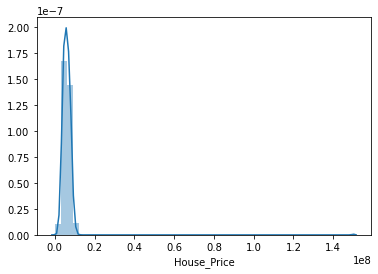

In [8]:
sns.distplot(df['House_Price'])

<AxesSubplot:xlabel='House_Price'>

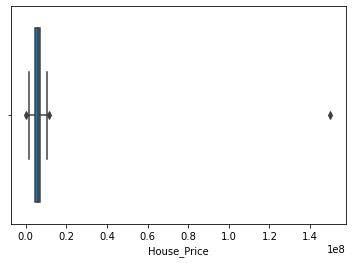

In [9]:
sns.boxplot(df['House_Price'])

In [10]:
##Finding Outliers
hp = sorted(df['House_Price'])
q1,q3 = np.percentile(hp,[25,75])
lower_bound = q1 - (1.5 * (q3-q1))
upper_bound = q3 + (1.5 * (q3-q1))
below = df['House_Price'] > lower_bound
above = df['House_Price'] < upper_bound
df = df[below & above]
df

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


<AxesSubplot:xlabel='House_Price'>

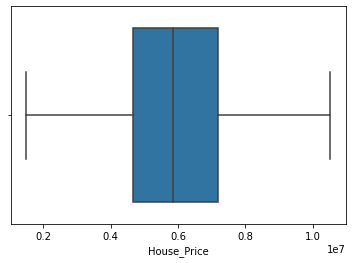

In [14]:
sns.boxplot(df['House_Price'])
#After removal of outliers, the distribution of house price has become fairly normal.

<AxesSubplot:xlabel='House_Price'>

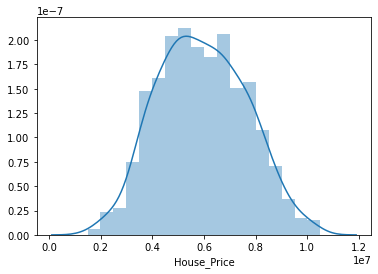

In [15]:
sns.distplot(df['House_Price'])

In [16]:
df.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [17]:
df.City_Category.value_counts()

CAT B    364
CAT A    327
CAT C    238
Name: City_Category, dtype: int64

In [18]:
df.Parking.value_counts() ## Distribution of observation for parking

Open            371
Not Provided    227
Covered         187
No Parking      144
Name: Parking, dtype: int64

In [19]:
df_new = df.dropna() ## Code will remove any instance which contans any null values

In [20]:
df_new.shape

(896, 9)

In [21]:
df_new.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [22]:
df_new.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

<AxesSubplot:>

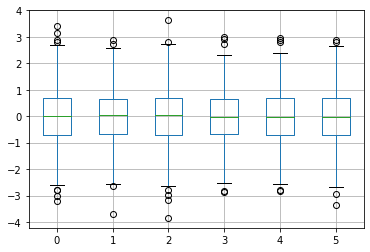

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new[['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall']])
pd.DataFrame(scaler.transform(df_new[['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall']])).boxplot()

<AxesSubplot:>

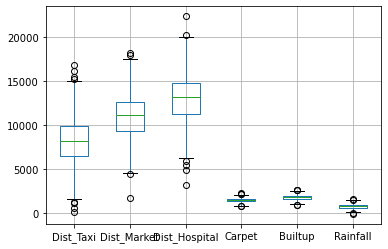

In [24]:
df_new.boxplot(column = ['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall'])

In [25]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputer1 = pd.DataFrame(imp_mean.fit_transform(df.values))
df_imputer1.columns = df.columns
df_imputer1.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796,5250,10703,1659,1961,Open,CAT B,530,6649000
1,8294,8186,12694,1461,1752,Not Provided,CAT B,210,3982000
2,11001,14399,16991,1340,1609,Not Provided,CAT A,720,5401000
3,8301,11188,12289,1451,1748,Covered,CAT B,620,5373000
4,10510,12629,13921,1770,2111,Not Provided,CAT B,450,4662000


In [26]:
df_imputer1.isnull().sum()

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

In [27]:
df_imputed = df.fillna(df.mean())

In [28]:
df_imputed.isnull().sum()

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
category = df_imputed.select_dtypes(include=[object])
num= df_imputed.select_dtypes(include=['float64','int64'])

In [31]:
encoded = category.apply(LabelEncoder().fit_transform)
onehot = pd.DataFrame(OneHotEncoder().fit_transform(encoded).toarray())
onehot.columns = ['Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'Parking_Open', 'City_Category_CAT A',
       'City_Category_CAT B', 'City_Category_CAT C']

In [32]:
onehot.head()

,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
df_onehotencoded = pd.concat([onehot.reset_index(drop=True), num], axis=1)

In [34]:
df_onehotencoded.head()

,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9796.0,5250.0,10703.0,1659.0,1961.0,530.0,6649000.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8294.0,8186.0,12694.0,1461.0,1752.0,210.0,3982000.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11001.0,14399.0,16991.0,1340.0,1609.0,720.0,5401000.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8301.0,11188.0,12289.0,1451.0,1748.0,620.0,5373000.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10510.0,12629.0,13921.0,1770.0,2111.0,450.0,4662000.0


In [37]:
#Another method
getdummy = pd.get_dummies(df_imputed)
getdummy.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,1,0,1,0
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,0,1,0
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,0,1,0,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,0,1,0
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,0,1,0


In [38]:
matrix = df.corr()

In [39]:
matrix

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449722,0.796846,0.011391,0.007170,0.020620,0.111612
Dist_Market,0.449722,1.000000,0.620130,-0.017377,-0.019288,0.069608,0.121574
Dist_Hospital,0.796846,0.620130,1.000000,0.011606,0.009124,0.050813,0.132047
Carpet,0.011391,-0.017377,0.011606,1.000000,0.998871,-0.046031,0.095636
Builtup,0.007170,-0.019288,0.009124,0.998871,1.000000,-0.042856,0.087600
Rainfall,0.020620,0.069608,0.050813,-0.046031,-0.042856,1.000000,0.007758
House_Price,0.111612,0.121574,0.132047,0.095636,0.087600,0.007758,1.000000


<AxesSubplot:>

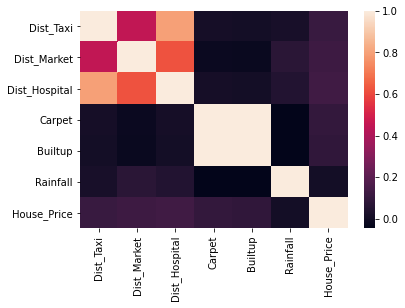

In [40]:
sns.heatmap(matrix)

In [41]:
getdummy.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Rainfall', 'House_Price', 'Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'Parking_Open', 'City_Category_CAT A',
       'City_Category_CAT B', 'City_Category_CAT C'],
      dtype='object')

In [42]:
df_dummy = getdummy.drop(['Parking_Open','City_Category_CAT C'], axis=1)
df_dummy.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Rainfall', 'House_Price', 'Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'City_Category_CAT A', 'City_Category_CAT B'],
      dtype='object')

In [43]:
x = df_dummy.drop('House_Price', axis=1)
y = df_dummy.House_Price

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [45]:
print(df_dummy.shape)
print(x_train.shape)
print(y_train.shape)

(929, 12)
(743, 11)
(743,)


In [46]:
x_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
347,9375.0,9562.0,12062.0,1222.0,1473.000000,630,0,0,1,1,0
869,5536.0,12153.0,11937.0,1304.0,1782.297268,530,0,0,0,0,0
840,3286.0,10258.0,10623.0,1447.0,1730.000000,510,1,0,0,0,0
247,10631.0,8780.0,15335.0,1184.0,1434.000000,670,0,0,1,0,0
153,9334.0,12267.0,14658.0,1442.0,1750.000000,130,0,0,1,0,1


In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression().fit(x_train,y_train)

In [50]:
pred = model.predict(x_test)

In [51]:
model.score(x_test,y_test)

0.3636298782810303

In [52]:
# Adjusted R square
1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3233995832298311

Text(0, 0.5, 'residuals')

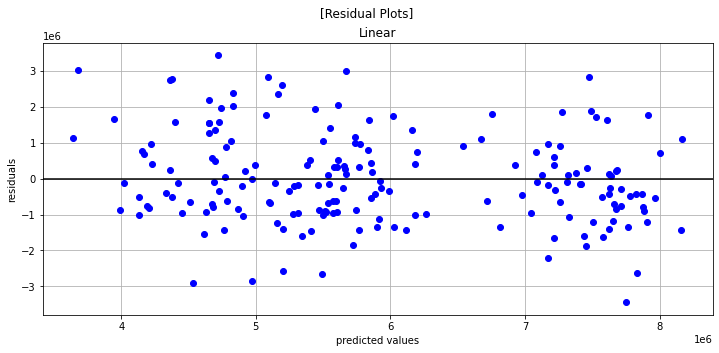

In [55]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

Text(0.5, 1.0, 'Linear')

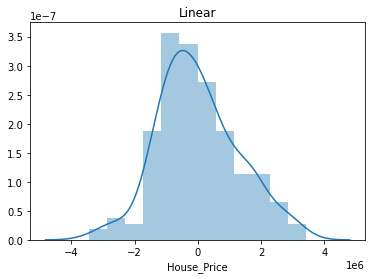

In [56]:
import seaborn as sns

y_pred= model.predict(x_test)
residuals_linear = y_test - y_pred
sns.distplot(residuals_linear)
plt.title('Linear')

In [57]:
#Removing outliers
hp = sorted(df_dummy['House_Price'])
q1, q3 = np.percentile(hp, [25,75])
lower_bound = q1 - (1.5 * (q3-q1))
upper_bound = q1 + (1.5 * (q3-q1))
below = df_dummy['House_Price'] > lower_bound
above = df_dummy['House_Price'] < upper_bound
df_dummy = df_dummy[below & above]
df_dummy.shape

(858, 12)

In [58]:
x.shape

(929, 11)

In [60]:
x = df_dummy.drop('House_Price', axis=1)
y = df_dummy.House_Price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [64]:
model = LinearRegression().fit(x_train,y_train)

In [65]:
print(model.score(x_test,y_test))

0.4114680555176118


In [66]:
print(1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.3710064843344476


<AxesSubplot:title={'center':'Model Coefficients'}>

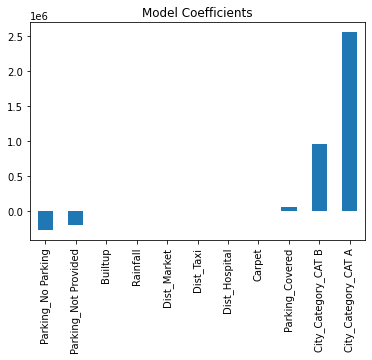

In [67]:
predictors = x_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

Text(0, 0.5, 'residuals')

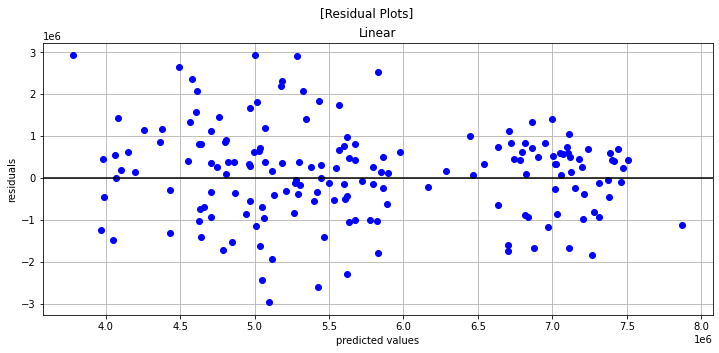

In [68]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

Text(0.5, 1.0, 'Linear')

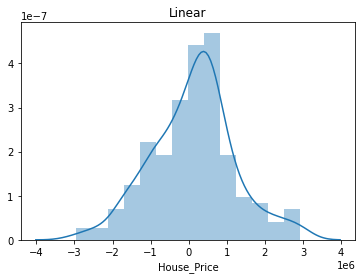

In [69]:
residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

C:\Users\user\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [72]:
vif

,VIF,features
0,31.083690,Dist_Taxi
1,32.534023,Dist_Market
2,85.591098,Dist_Hospital
3,1418.117911,Carpet
4,1424.940832,Builtup
5,8.860330,Rainfall
6,1.459148,Parking_Covered
7,1.411937,Parking_No Parking
8,1.606444,Parking_Not Provided
9,2.071486,City_Category_CAT A


In [73]:
x_new = x.drop(['Dist_Hospital','Builtup','Dist_Market'], axis=1)
x_new.shape

(858, 8)

In [74]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns
vif

,VIF,features
0,10.294142,Dist_Taxi
1,15.285398,Carpet
2,8.176508,Rainfall
3,1.448999,Parking_Covered
4,1.399274,Parking_No Parking
5,1.594066,Parking_Not Provided
6,2.044226,City_Category_CAT A
7,2.422096,City_Category_CAT B


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y,test_size = 0.20,random_state=5) 

In [76]:
model1 = LinearRegression().fit(x_train,y_train)

In [77]:
model1.score(x_test,y_test)

0.41955602434985817

In [78]:
df_dummy.head() ## let us use the entire data set to build the model

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,1
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,1
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,1


In [79]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [80]:
x = df_dummy.drop('House_Price',axis=1)  ### Features
y = df_dummy.House_Price  ### Labels
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5)

In [81]:
ridgeReg = Ridge(alpha=0.0005, normalize=True)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
score = ridgeReg.score(x_test,y_test)
score

0.41157098253952895

In [82]:
ridgeReg.coef_

array([ 3.41201236e+01, -1.30639186e+01,  5.91539832e+01,  1.07020051e+03,
       -2.15826129e+02, -1.05454816e+02,  5.84140231e+04, -2.63600988e+05,
       -1.96354246e+05,  2.55521277e+06,  9.56913631e+05])

<AxesSubplot:title={'center':'Model Coefficients'}>

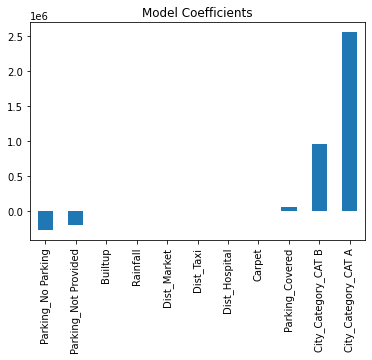

In [83]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [84]:
lassoReg = Lasso(alpha=0.03)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

0.411468050049952

In [85]:
lassoReg.coef_

array([ 3.40989666e+01, -1.31059668e+01,  5.92154642e+01,  1.09075368e+03,
       -2.33023603e+02, -1.05595823e+02,  5.81717243e+04, -2.63762627e+05,
       -1.96564583e+05,  2.55749015e+06,  9.58493575e+05])

<AxesSubplot:title={'center':'Model Coefficients'}>

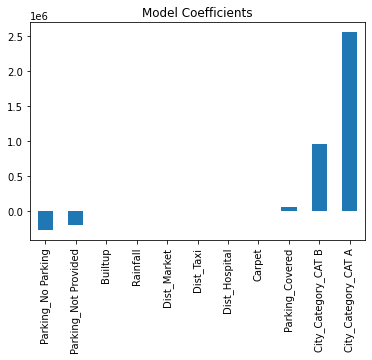

In [86]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')